# Effective Targetting of Advertisments

In [19]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import advertising csv & view data
ad_data = pd.read_csv("../resources/advertising_ef.csv")
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,NaN,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


In [3]:
# view data info: columns, null count, data types, etc. 
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1005 non-null   float64
 1   Age                       998 non-null    float64
 2   Area Income               998 non-null    float64
 3   Daily Internet Usage      1005 non-null   float64
 4   Ad Topic Line             1009 non-null   object 
 5   City                      998 non-null    object 
 6   Gender                    1009 non-null   object 
 7   Country                   996 non-null    object 
 8   Timestamp                 1009 non-null   object 
 9   Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 79.0+ KB


- Total of 10 columns and 1009 entries
- Dtypes: float64, int64, and objects
- Nulls are present in six columns 

## Data Preprocessing

In [4]:
# view the total amount of nulls in all 10 columns 
ad_data.isna().sum()

Daily Time Spent on Site     4
Age                         11
Area Income                 11
Daily Internet Usage         4
Ad Topic Line                0
City                        11
Gender                       0
Country                     13
Timestamp                    0
Clicked on Ad                0
dtype: int64

- replace the null values with its median instead of automatic deletion

In [5]:
#rename "Daily Time Spent on Site" Column 
ad_data.rename(columns={'Daily Time Spent on Site':'Daily_Time_Spent_on_Site'}, inplace=True)

# print describe on the column to find the median and view the distribution
print(ad_data['Daily_Time_Spent_on_Site'].describe())

count    1005.000000
mean       65.009463
std        15.879997
min        32.600000
25%        51.300000
50%        68.370000
75%        78.570000
max        91.430000
Name: Daily_Time_Spent_on_Site, dtype: float64


In [6]:
# fill null data on 'Daily Time Spent on Site':'Daily_Time_Spent_on_Site' column with its medians 
ad_data['Daily_Time_Spent_on_Site'].fillna(ad_data['Daily_Time_Spent_on_Site'].median(),inplace=True)

# double check for nulls 
print(ad_data['Daily_Time_Spent_on_Site'].isna().sum())

0


In [7]:
# find the median of 'Age' column for null replacement
print(ad_data['Age'].describe())

count    998.000000
mean      35.962926
std        8.772142
min       19.000000
25%       29.000000
50%       35.000000
75%       42.000000
max       61.000000
Name: Age, dtype: float64


In [8]:
# Fill 'Age' nulls with Median value 
ad_data['Age'].fillna(ad_data['Age'].median(),inplace=True)

# double check for nulls 
print(ad_data['Age'].isna().sum())

0


In [9]:
# Rename 'Area Income' to 'Area_Income'
ad_data.rename(columns={'Area Income':'Area_Income'}, inplace=True)

# print describe on the column to find the median and view the distribution
print(ad_data['Area_Income'].describe())

count      998.000000
mean     54958.573617
std      13381.286752
min      13996.500000
25%      46993.367500
50%      56998.245000
75%      65267.402500
max      79484.800000
Name: Area_Income, dtype: float64


In [10]:
# fill 'Area_Income' Null values with Median
ad_data['Area_Income'].fillna(ad_data['Area_Income'].median(),inplace=True)

# double check for nulls 
print(ad_data['Area_Income'].isna().sum())

0


In [11]:
# round 'Age' values to 2 decimal places
ad_data['Area_Income']= ad_data['Area_Income'].round(2)

# check for decimal places 
print(ad_data['Area_Income'])

0       61833.90
1       68441.85
2       59785.94
3       54806.18
4       73889.99
          ...   
1004    71384.57
1005    67782.17
1006    42415.72
1007    41920.79
1008    29875.80
Name: Area_Income, Length: 1009, dtype: float64


In [12]:
# rename 'Daily Internet Usage' column 
ad_data.rename(columns={'Daily Internet Usage':'Daily_Internet_Usage'}, inplace=True)

# print describe on the column to find the median and view the distribution
print(ad_data['Daily_Internet_Usage'].describe())

count    1005.000000
mean      180.041920
std        43.923438
min       104.780000
25%       138.870000
50%       183.420000
75%       218.800000
max       269.960000
Name: Daily_Internet_Usage, dtype: float64


In [13]:
# fill 'Daily_Internet_Usage' Null values with Median
ad_data['Daily_Internet_Usage'].fillna(ad_data['Daily_Internet_Usage'].median(),inplace=True)

# double check for nulls 
print(ad_data['Daily_Internet_Usage'].isna().sum())

0



- Although it is possible to fill the null values in both 'City' & 'Country', this may affect the integrity of the data. Thus, these null values for 'City' = 11 & 'Country'= 13 will be dropped. 

In [14]:
# drop 'City' and Country null values
ad_data = ad_data.dropna(subset=['City', 'Country'])

# double check for null values
print(ad_data['City'].isna().sum())
print(ad_data['Country'].isna().sum())

0
0


In [15]:
# check final time for null values
ad_data.isna().sum()

Daily_Time_Spent_on_Site    0
Age                         0
Area_Income                 0
Daily_Internet_Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [21]:
#convert ad_data into dataframe
ad_data_df = pd.DataFrame(ad_data)

## Correlation between Columns 

In [22]:
# view correlation using pearson correlation 
ad_data_df.corr(method = 'pearson')

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Clicked on Ad
Daily_Time_Spent_on_Site,1.000000,-0.326590,0.306701,0.508933,-0.739956
Age,-0.326590,1.000000,-0.173419,-0.364919,0.483994
Area_Income,0.306701,-0.173419,1.000000,0.325323,-0.467634
Daily_Internet_Usage,0.508933,-0.364919,0.325323,1.000000,-0.783114
Clicked on Ad,-0.739956,0.483994,-0.467634,-0.783114,1.000000


<AxesSubplot:>

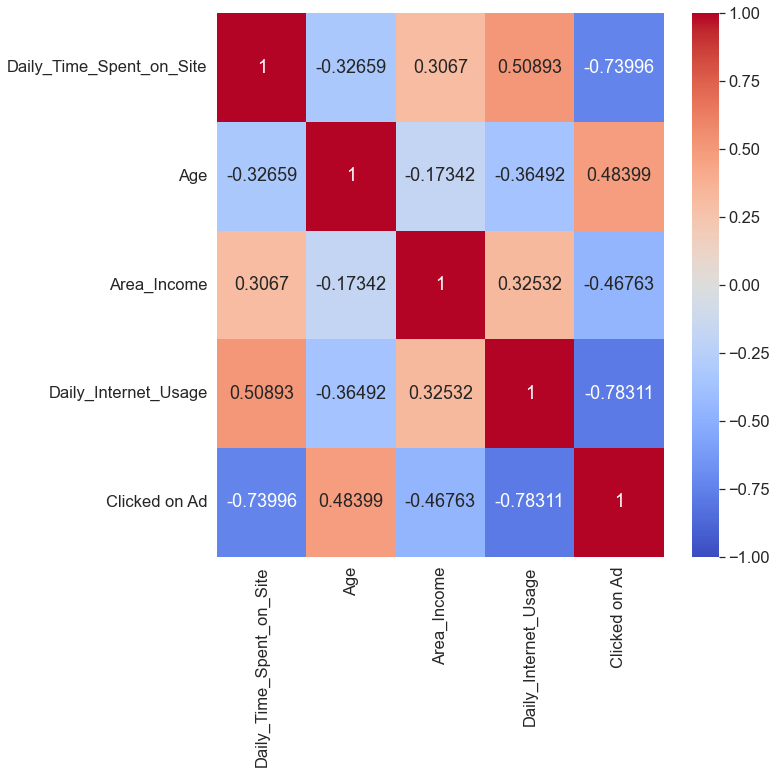

In [28]:
# create a heat map for visual correlation 
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

sns.heatmap(ad_data_df.corr(method = 'pearson'),
            cmap='coolwarm',
            annot=True,
            fmt='.5g',
            vmin=-1, 
            vmax=1)

<AxesSubplot:xlabel='Age', ylabel='Count'>

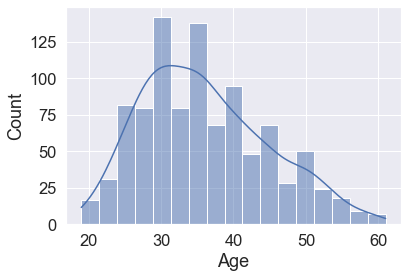

In [30]:
# view the age demographics using a histogram 
sns.histplot(ad_data_df['Age'], kde=True)

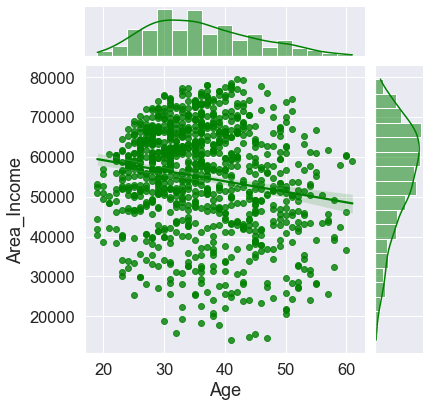

In [32]:
# create a joined plot to analyze Area Income and Age
sns.jointplot(data=ad_data_df, x="Age", y="Area_Income", kind="reg", color="green")

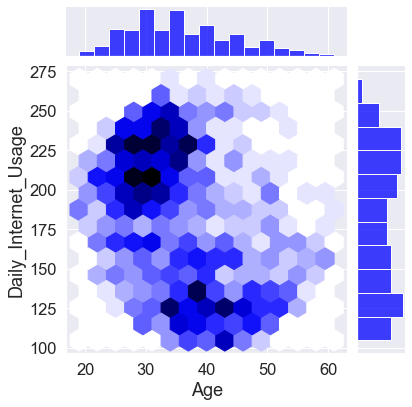

In [36]:
# create a joined plot to analyze Daily Internet Usage and Age
sns.jointplot(data=ad_data_df, x="Age", y="Daily_Internet_Usage", kind="hex", color="blue")

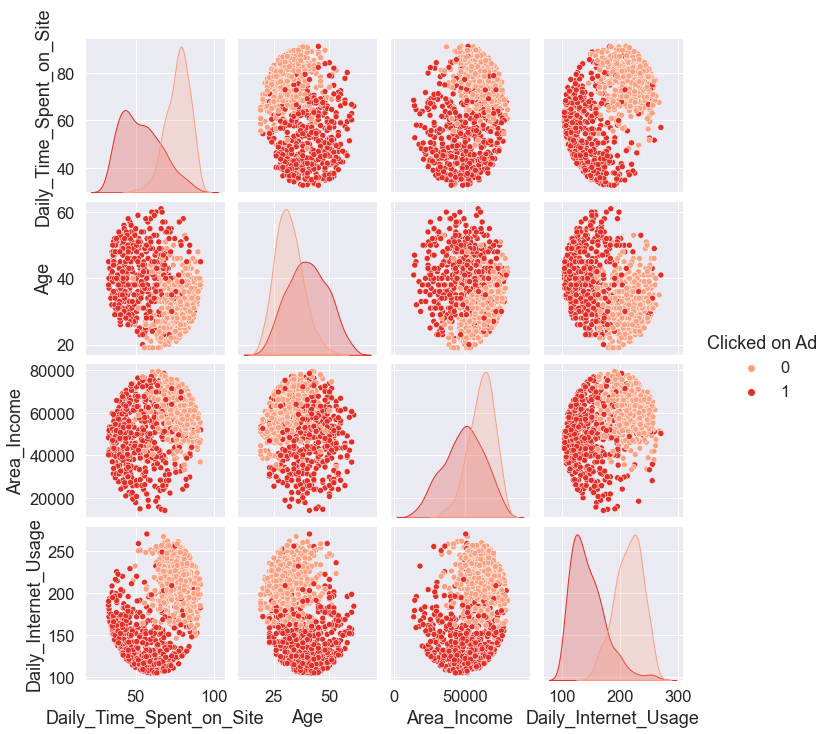

In [39]:
# Analyze the relation between all the variables with the target (Clicked on Ad)
sns.pairplot(ad_data_df, hue='Clicked on Ad', palette="Reds", kind = "scatter")

## Check for Data Imbalances

In [40]:
# See the differences between 1(yes) and 0(no) on target 'Clicked on Ad'
ad_data_df['Clicked on Ad'].value_counts()

1    499
0    486
Name: Clicked on Ad, dtype: int64

In [42]:
# take cleaned dataset and convert to csv
ad_data_df.to_csv("../resources/Cleaned_Ads.csv")

## Data Modelling 

In [44]:
# read in cleaned data and call head 
clean_data = pd.read_csv("../resources/Cleaned_Ads.csv")
clean_data.head()

,Unnamed: 0,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,1,68.37,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


In [45]:
# view data columns, dtype, and nulls
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                985 non-null    int64  
 1   Daily_Time_Spent_on_Site  985 non-null    float64
 2   Age                       985 non-null    float64
 3   Area_Income               985 non-null    float64
 4   Daily_Internet_Usage      985 non-null    float64
 5   Ad Topic Line             985 non-null    object 
 6   City                      985 non-null    object 
 7   Gender                    985 non-null    object 
 8   Country                   985 non-null    object 
 9   Timestamp                 985 non-null    object 
 10  Clicked on Ad             985 non-null    int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 84.8+ KB


In [49]:
# check for unique values in City, Country, and Ad Topic columns, all of which are object Dtype
object_type = ['City', 'Country', 'Ad Topic Line']
clean_data[object_type].describe(include=['O'])

,City,Country,Ad Topic Line
count,985,985,985
unique,952,237,979
top,Lisamouth,Czech Republic,Networked local secured line
freq,3,9,2


- Looking at the table above, it is evident that there are abundant unique values in all three variables. Thus, this will make it difficult to find a pattern from ['Country', 'City', 'Ad Topic Line']. As a result, looking into different variables to formulate a pattern is necessary.

In [50]:
# evaluate the time stamp column, and split the column into month and hour

clean_data['Timestamp'] = pd.to_datetime(clean_data['Timestamp'])
clean_data['Month'] = clean_data['Timestamp'].dt.month
clean_data['Hour'] = clean_data['Timestamp'].dt.hour

# drop original time stamp column 
clean_data = clean_data.drop(['Timestamp'], axis=1)

#view first five rows 
clean_data.head(5)

,Unnamed: 0,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,Month,Hour
0,0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,0,3,0
1,1,68.37,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,0,4,1
2,2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,0,3,20
3,3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,0,10,2
4,4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,0,3,3


In [52]:
# drop 'Unnamed:0' column 
clean_data.drop("Unnamed: 0", axis=1, inplace=True)

#view first five rows to check
clean_data.head(5)

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,Month,Hour
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,0,3,0
1,68.37,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,0,4,1
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,0,3,20
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,0,10,2
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,0,3,3


## Label Encoding 

In [53]:
#import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [54]:
# use label encoder for 'Gender' column 
gender_encoder = LabelEncoder()
clean_data['Gender'] = gender_encoder.fit_transform(clean_data['Gender'])

# view first five rows 
clean_data.head(5)

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,Month,Hour
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,0
1,68.37,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,1
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,20
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,10,2
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,3,3


## Correlation with Clean Data

In [56]:
# view correlation using pearson correlation 
clean_data.corr(method = 'pearson')

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Gender,Clicked on Ad,Month,Hour
Daily_Time_Spent_on_Site,1.000000,-0.326590,0.306701,0.508933,-0.030979,-0.739956,-0.019263,0.000975
Age,-0.326590,1.000000,-0.173419,-0.364919,-0.016787,0.483994,0.012125,-0.052616
Area_Income,0.306701,-0.173419,1.000000,0.325323,0.005560,-0.467634,-0.034444,0.026851
Daily_Internet_Usage,0.508933,-0.364919,0.325323,1.000000,0.019791,-0.783114,0.000102,0.070520
Gender,-0.030979,-0.016787,0.005560,0.019791,1.000000,-0.030928,-0.032620,0.059198
Clicked on Ad,-0.739956,0.483994,-0.467634,-0.783114,-0.030928,1.000000,0.034379,-0.044268
Month,-0.019263,0.012125,-0.034444,0.000102,-0.032620,0.034379,1.000000,-0.006514
Hour,0.000975,-0.052616,0.026851,0.070520,0.059198,-0.044268,-0.006514,1.000000


<AxesSubplot:>

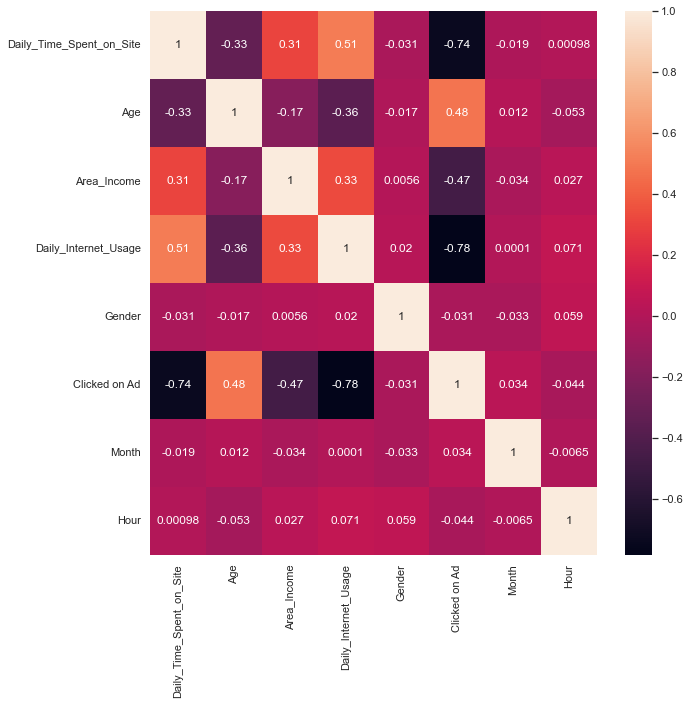

In [61]:
# utilize heatmap 
# create a heat map for visual correlation 
plt.figure(figsize=(10, 10))
sns.set(font_scale=1)

sns.heatmap(clean_data.corr(), annot=True)

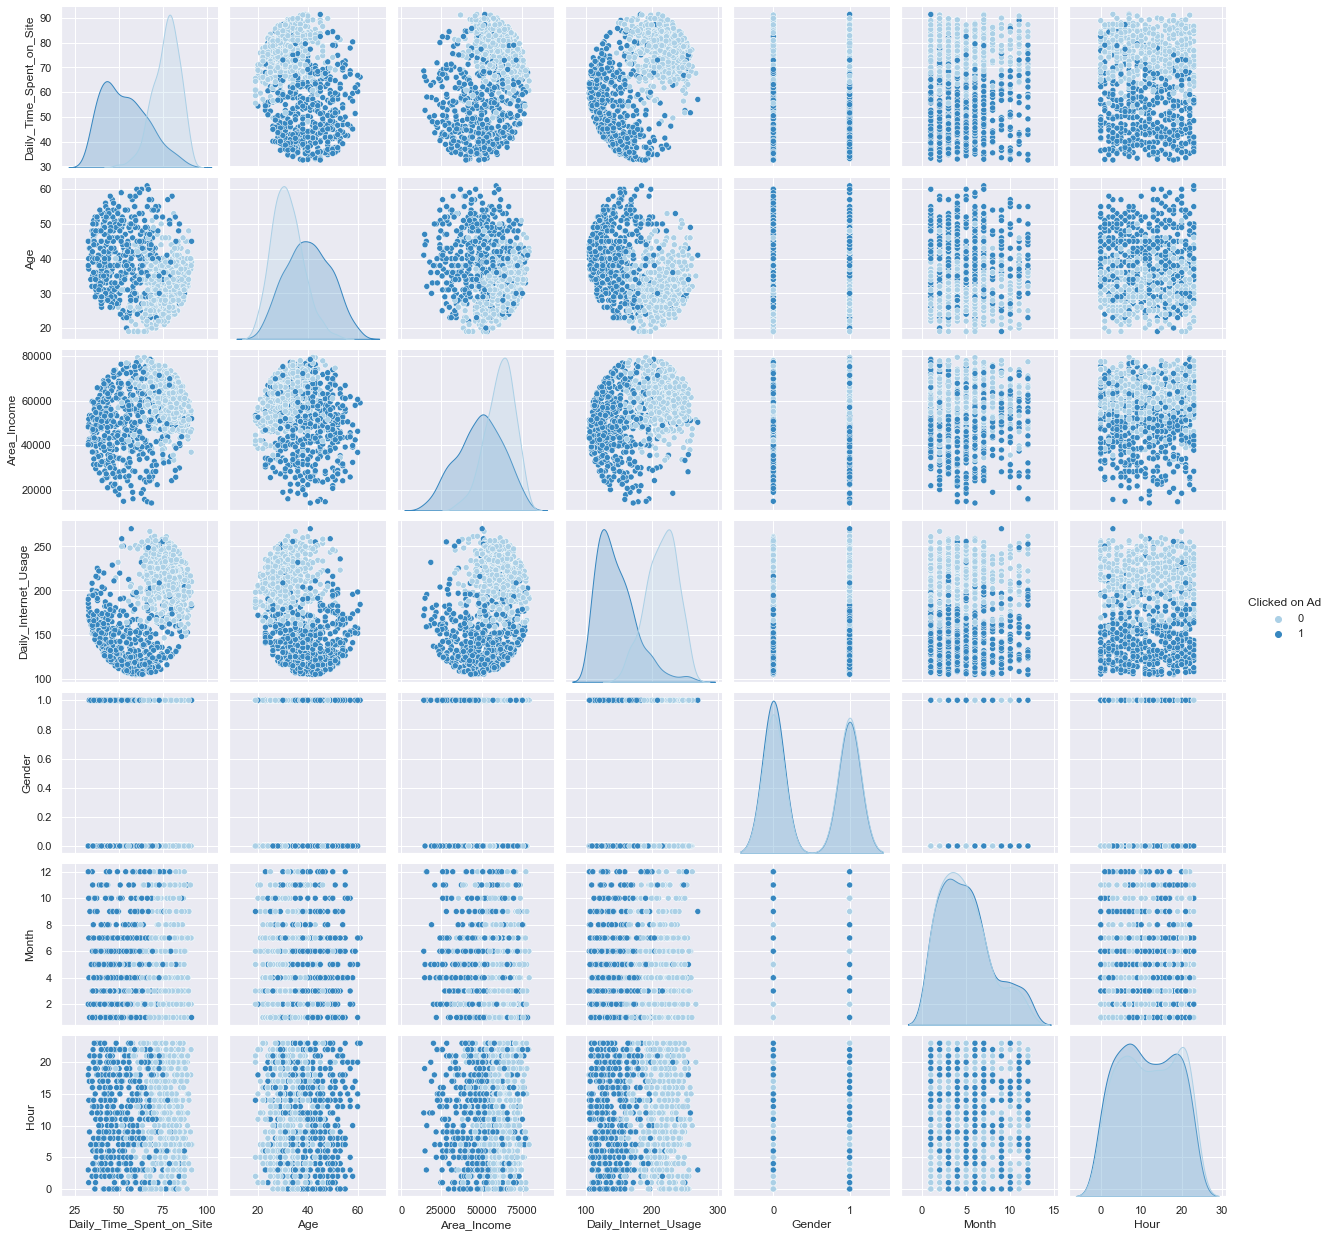

In [65]:
# Analyze the relation between all the variables with the target (Clicked on Ad) using pairplot
sns.pairplot(clean_data, hue='Clicked on Ad', palette= "Blues", kind = "scatter")

- It is vital to bring to light that the dataset is within the bounds of Classification. The goal is for the classification model is to predict whether the target ('Clicked on Ad') is either 1 (clicked on) or 0 (not clicked on). 
- The following models will be implemented 
        1) Logistic Regression
        2) Decision Tree Classifier